In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import re
import os
import operator
import collections

In [2]:
# npl related
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [3]:
from classifiers import *

C:\Users\desai\anaconda3\python.exe
['C:\\Users\\desai\\Documents\\ML_stuff\\000_gitrepos\\coursera\\sentimentAnalysis-sms', 'C:\\Users\\desai\\anaconda3\\python38.zip', 'C:\\Users\\desai\\anaconda3\\DLLs', 'C:\\Users\\desai\\anaconda3\\lib', 'C:\\Users\\desai\\anaconda3', '', 'C:\\Users\\desai\\anaconda3\\lib\\site-packages', 'C:\\Users\\desai\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\desai\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\desai\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\desai\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\desai\\.ipython']

Finished.................


# Inputs

In [4]:
# Numbers of observation to be selected from dataframe
num_examples = 100
# Get test and train dataframes
path_img = '../img/'
path_data =  '../data/'

# Pre train and test data

In [5]:
sms = pd.read_csv('data/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [6]:
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Cleaning Text

In [8]:
>>> import nltk
>>> nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [9]:
# cleaning reviews
sms['message_C'] = sms['message'].apply(get_cleaned_text, words_len=1,
                                          remove_stopwords=True, is_stemming=True,
                                          is_lemma=False, split=False)

In [10]:
sms.head()

,label,message,message_C
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [11]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5572 non-null   object
 1   message    5572 non-null   object
 2   message_C  5572 non-null   object
dtypes: object(3)
memory usage: 130.7+ KB


# Story length

In [12]:
sms['preccleanlen'] = sms['message_C'].str.len()

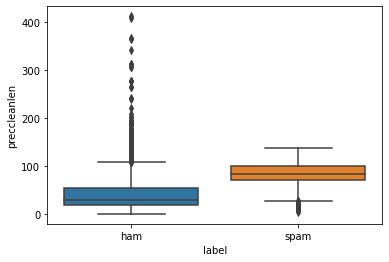

In [13]:
sns.boxplot(x= "label" , y= "preccleanlen", data=sms)

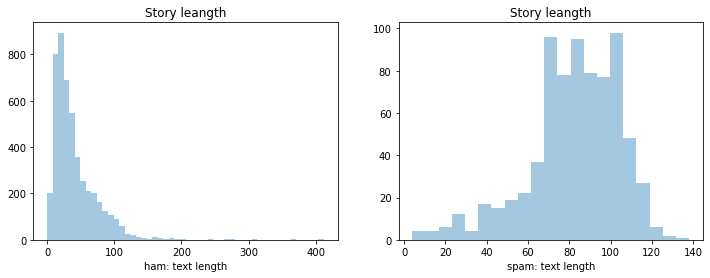

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.distplot(sms[sms.label=='ham']['preccleanlen'], ax=ax1, kde=False)
ax1.set(xlabel= "ham: text length", title='Story leangth');

sns.distplot(sms[sms.label=='spam']['preccleanlen'], ax=ax2, kde=False)
ax2.set(xlabel= "spam: text length", title='Story leangth');

# Vectorizing Text

In [15]:
from nltk.corpus import stopwords

In [16]:
# corpus = []
# ps = PorterStemmer()
# for i in range(sms.shape[0]):
#     msg = re.sub('^[a-zA-Z]', ' ', sms['message'][i])
#     msg = msg.lower()
#     msg = msg.split()
    
#     msg = [ps.stem(word) for word in msg if not word in stopwords.words('english')]
    
#     msg = " ".join(msg)
#     corpus.append(msg)

In [17]:
print ('step:2 vectorizing text')
cv = CountVectorizer(max_features=500, ngram_range=(1,1))
X = cv.fit_transform(sms['message_C']).toarray()
y = sms['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

train_cv = pd.DataFrame(X_train, columns=cv.get_feature_names())
test_cv = pd.DataFrame(X_test, columns=cv.get_feature_names())
print ('\nstep 2 completed')

step:2 vectorizing text

step 2 completed


# Word Cloud

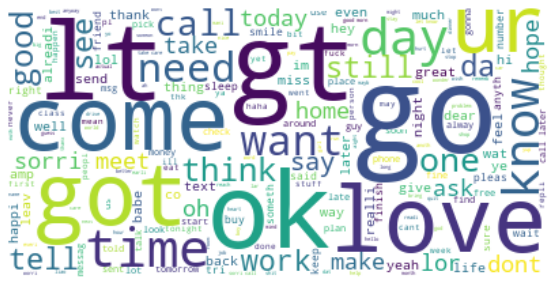

In [18]:
pos_str = sms[sms.label=='ham'].message_C.values.tolist()
pos_str = " ".join(pos_str)
wc = WordCloud(background_color='white').generate(pos_str)
plt.figure(figsize=(16,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

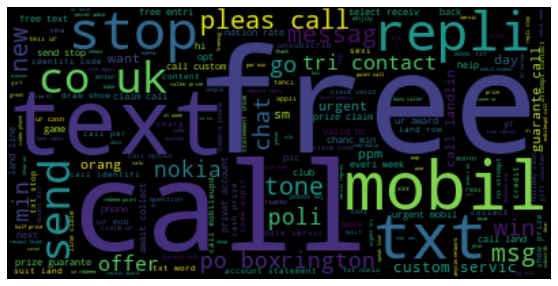

In [19]:
neg_str = sms[sms.label=='spam'].message_C.values.tolist()
neg_str = " ".join(neg_str)
wc = WordCloud(background_color='black').generate(neg_str)
plt.figure(figsize=(16,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Ploting cout of the classes

step: 5 plotting label counts
step 5 completed......



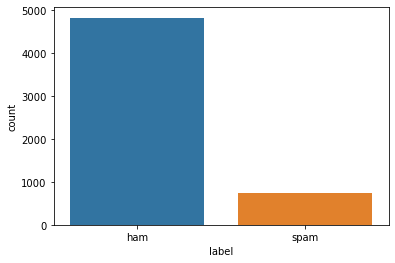

In [20]:
print ('step: 5 plotting label counts')
sns.countplot(x='label', data=sms)
print ('step 5 completed......\n')

# feature importance

In [21]:
print ('step: 6 plotting feature importance')

max_words = 200

words = cv.get_feature_names()
word_frequency = X.sum(axis=0)

feature_imp = dict(zip(words, word_frequency))
sorted_features = sorted(feature_imp.items(),
                                key=operator.itemgetter(1), reverse=True)
df_imp = pd.DataFrame(sorted_features, columns=['word', 'frequency'])

step: 6 plotting feature importance


step 6 completed......



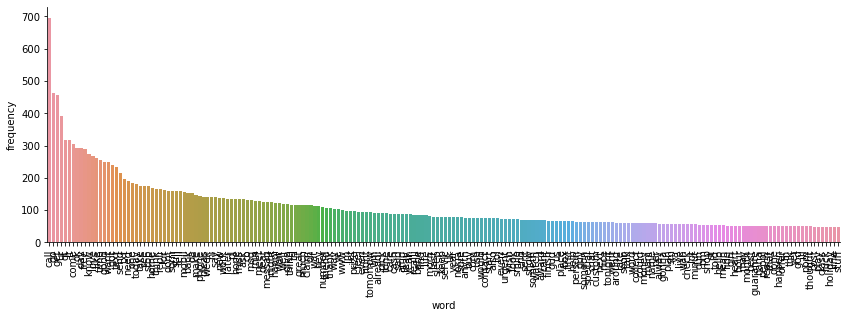

In [22]:
sns_plot = sns.catplot(x='word' , y='frequency', kind='bar', data=df_imp[0:max_words], height=4, aspect=3)
sns_plot.set_xticklabels(rotation=90)
print ('step 6 completed......\n')

In [23]:
from classifiers import *

In [24]:
df_r, cm = clf_model(X_train, y_train, X_test, y_test, model=None, path4plot=None)

	 1. --> model_knn
	 2. --> model_gb
	 3. --> model_mnb
	 4. --> model_dt
	 5. --> model_rf
	 6. --> model_edt
	 7. --> model_svc
	 8. --> model_lr
	 9. --> model_xgb
	 10. --> model_abc
	 11. --> model_nusvc
		** error in model_nusvc: specified nu is infeasible
	 12. --> model_linsvc
	 13. --> model_sgd
	 14. --> model_gpc
	 15. --> model_gbc
	 16. --> model_mlp


In [25]:
df_r = df_r.sort_values(by='test_acc', ascending=False)

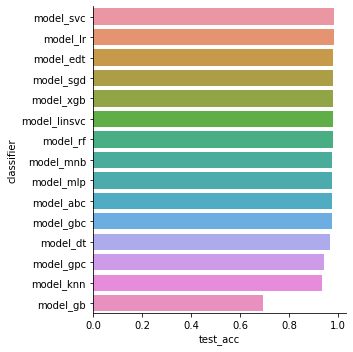

In [26]:
sns.catplot(x='test_acc', y='classifier', kind='bar', data=df_r)

In [27]:
df_r

,classifier,train_acc,test_acc,f1_wighted,f1_macro,f1_macro
6,model_svc,0.992564,0.982057,0.981638,0.982057,0.960438
7,model_lr,0.988718,0.982057,0.981711,0.982057,0.960744
5,model_edt,0.998718,0.981459,0.981083,0.981459,0.959357
11,model_sgd,0.996154,0.980263,0.980059,0.980263,0.957552
8,model_xgb,0.990769,0.979067,0.978599,0.979067,0.953934
10,model_linsvc,0.996923,0.979067,0.978931,0.979067,0.955315
4,model_rf,0.998718,0.978469,0.978010,0.978469,0.952710
2,model_mnb,0.979744,0.976077,0.976163,0.976077,0.949952
14,model_mlp,0.998718,0.975478,0.975411,0.975478,0.948041
9,model_abc,0.982564,0.974880,0.974345,0.974880,0.944828
